# Messi data exploration

Written report for this analysis can be found [here](../reports/messi_01_finding_leo.md)

In [1]:
from src import utilities

In [2]:
df = utilities.get_master("events_shot")
df.shape

(12003, 22)

In [4]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,12003,NaN,NaN,NaN,6001,3465.11,0,3000.5,6001,9001.5,12002
season_id,12003,NaN,NaN,NaN,23.7796,13.6433,1,21,25,38,42
country_name,12003,1,Spain,12003,NaN,NaN,NaN,NaN,NaN,NaN,NaN
competition_name,12003,1,La Liga,12003,NaN,NaN,NaN,NaN,NaN,NaN,NaN
season_name,12003,16,2017/2018,972,NaN,NaN,NaN,NaN,NaN,NaN,NaN
match_id,12003,NaN,NaN,NaN,128067,104482,9575,69139,69292,266320,303731
match_date,12003,485,2018-10-20,42,NaN,NaN,NaN,NaN,NaN,NaN,NaN
kick_off,12003,23,20:00:00.000,2194,NaN,NaN,NaN,NaN,NaN,NaN,NaN
season,12003,NaN,NaN,NaN,23.7796,13.6433,1,21,25,38,42
event_type,12003,1,shot,12003,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
messi_fullname = "Lionel AndrÃ©s Messi Cuccittini"
messi_fullname

'Lionel AndrÃ©s Messi Cuccittini'

In [8]:
(df.player == messi_fullname).value_counts()

False    9841
True     2162
Name: player, dtype: int64

In [18]:
## shots
df.loc[(df.player == messi_fullname), :].shape[0], df.loc[(df.player != messi_fullname), :].shape[0]

(2162, 9841)

In [19]:
## expected goals
df.loc[(df.player == messi_fullname), "statsbomb_xg"].sum(), df.loc[(df.player != messi_fullname), "statsbomb_xg"].sum()

(339.6547405485, 1160.1199815631999)

In [20]:
## goals
df.loc[(df.player == messi_fullname) & (df.outcome == "Goal"), :].shape[0], df.loc[(df.player != messi_fullname) & (df.outcome == "Goal"), :].shape[0]

(444, 1201)

In [40]:
## volume
print("Messi take {0}% of all shots taken".format(100 * 2162 / 9841))

Messi take 21.96931206178234% of all shots taken


In [42]:
## efficiency
print("Messi scores with {0}% of his shots versus {1}% for all other players".format(100 * 444 / 2161, 100 * 1201 / 9841))

Messi scores with 20.546043498380378% of his shots versus 12.204044304440606% for other players


In [49]:
## lucky
print("Mesi scored {0} more goals than expected versus {1} for all other players".format(444 - 340, 1201 - 1160))

Mesi scored 443.0 more goals than expected versus 41 for all other players


https://towardsdatascience.com/advanced-sports-visualization-with-pandas-matplotlib-and-seaborn-9c16df80a81b

In [21]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Arc, Rectangle, ConnectionPatch
from matplotlib.offsetbox import  OffsetImage

## Trends over time

<AxesSubplot:xlabel='season_name', ylabel='statsbomb_xg'>

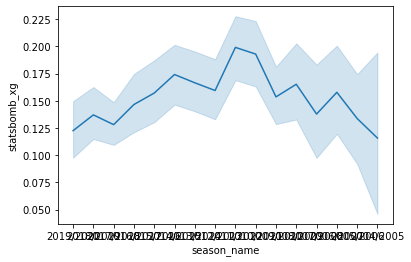

In [51]:
sns.lineplot(data=df[df.player == messi_fullname], x="season_name", y="statsbomb_xg")

## Where shots are taken from

In [24]:
def draw_pen_box(ax):
    # size of the pitch is 120, 80

    #Penalty Area
    plt.plot([57.8,57.8],[120,105.4],color="black")
    plt.plot([57.8,22.5],[105.4,105.4],color="black")
    plt.plot([22.5,22.5],[120, 105.4],color="black")

    #6-yard Box
    plt.plot([48,48],[120,115.1],color="black")
    plt.plot([48,32],[115.1,115.1],color="black")
    plt.plot([32,32],[120,115.1],color="black")

    #Penalty spot and the "D"
    topPenSpot = plt.Circle((40,110.3),0.71,color="black")
    ax.add_patch(topPenSpot)
    topDArc = Arc((40,110.3),height=16.2,width=16.2,angle=0,theta1=220,theta2=320,color="black")
    ax.add_patch(topDArc)
    
    #Goal line
    ax.axhline(y=120,color="black")

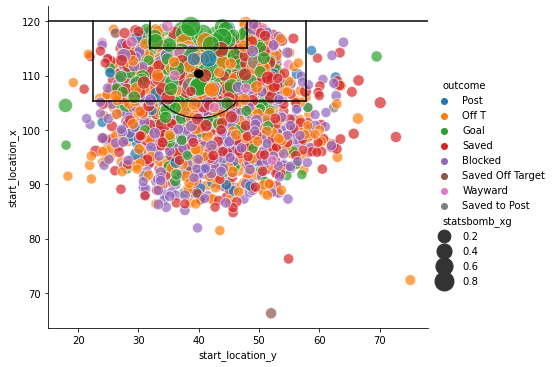

In [50]:
# fig = plt.figure()

# fig.set_size_inches(7, 5)
# ax=fig.add_subplot(1,1,1)
# g = sns.lmplot(x='start_location_x', y='start_location_y', size='statsbomb_xg', 
#            hue='team', data=shots, fit_reg=False, 
#            x_jitter=0.1, y_jitter=0.1, markers="o", palette="viridis") #, height=7)

g = sns.relplot(x='start_location_y', y='start_location_x', size='statsbomb_xg', hue="outcome",
            sizes=(100, 400), alpha=.7, aspect=1.2, height=5, 
                data=df[df.player == messi_fullname])

ax = plt.gca()
draw_pen_box(ax)

plt.show()

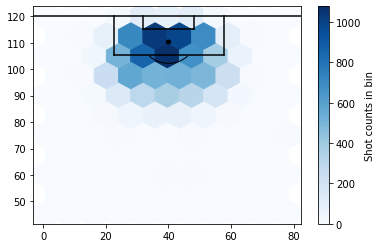

In [27]:
# plt.contour(shots.start_location_y, shots.start_location_x, shots.statsbomb_xg) - DOES NOT WORK
# plt.hist2d(shots.start_location_y, shots.start_location_x, bins=5, cmap="Blues")
plt.hexbin(df.start_location_y, df.start_location_x, gridsize=10, cmap="Blues")
cb = plt.colorbar()
cb.set_label("Shot counts in bin")

ax = plt.gca()
draw_pen_box(ax)

plt.show()

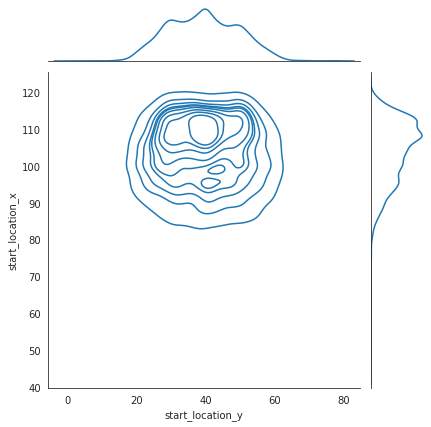

In [28]:
with sns.axes_style("white"):
    sns.jointplot(x="start_location_y", y="start_location_x", data=df, kind="kde");

## Where shots end up

In [29]:
def draw_posts(ax):
    
    ## 24ft x 8ft
    x1 = 36.
    x2 = 44.
    y1 = 0.
    y2 = (x2 - x1) * 8. / 24.
    
    x=[x1, x1, x2, x2]
    y=[y1, y2, y2, y1]
    
    plt.plot(x, y, color="black")
    ax.axhline(y=0,color="black")

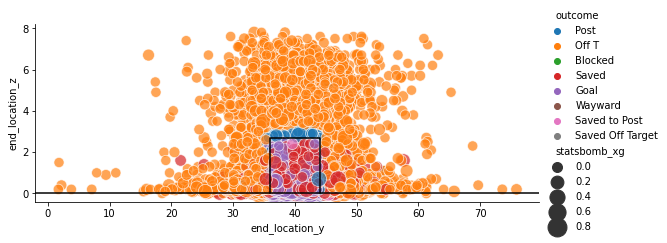

In [34]:
sns.relplot(x='end_location_y', y='end_location_z', size='statsbomb_xg', hue="outcome",
            sizes=(100, 400), alpha=.7, aspect=2.5, height=3, 
                data=df)

ax = plt.gca()
draw_posts(ax)
plt.show()

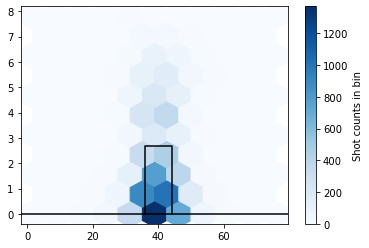

In [31]:
# plt.hist2d(shots.dropna(subset=["end_location_z"]).end_location_y, shots.dropna(subset=["end_location_z"]).end_location_z, bins=10, cmap="Blues")
plt.hexbin(df.dropna(subset=["end_location_z"]).end_location_y, df.dropna(subset=["end_location_z"]).end_location_z, 
           gridsize=10, cmap="Blues")
cb = plt.colorbar()
cb.set_label("Shot counts in bin")

ax = plt.gca()
draw_posts(ax)
plt.show()

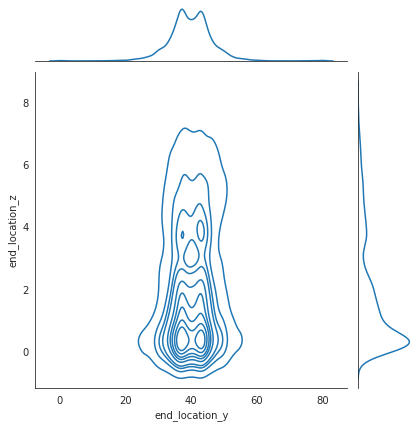

In [32]:
with sns.axes_style("white"):
    sns.jointplot(x="end_location_y", y="end_location_z", data=df, kind="kde");